## **Mobile Phone Price Prediction and Clustering**

Team Members:
1. Megan Rochella - 0706022210028
2. Richard Alberto - 0706022210024

## **Introduction**
In today's highly competitive mobile phone market, companies need to adopt data-driven approaches to succeed. Bob, an entrepreneur who has recently launched his own mobile company, aims to establish a competitive edge by pricing his products strategically. However, determining a suitable price range for mobile phones based on their features can be challenging.

This project leverages machine learning to classify mobile phones into different price ranges based on their specifications, such as RAM, internal memory, battery power, and camera quality. By analyzing the relationship between these features and price categories, Bob can make informed decisions to compete with established brands like Apple and Samsung.

In addition to classification, clustering techniques will be applied to uncover natural groupings in the data, offering further insights into market segmentation. This project serves as a comprehensive exploration of how machine learning can empower businesses to thrive in competitive environments.

## **Metadata**

Dataset Overview: The dataset contains specifications of mobile phones, such as hardware features, network capabilities, and usability metrics, along with their price range classification.

Attributes:
- battery_power: Total battery capacity in mAh.
- blue: Bluetooth capability (0: No, 1: Yes).
- clock_speed: Processing speed in GHz.
- dual_sim: Dual SIM support (0: No, 1: Yes).
- fc: Front camera megapixels.
- four_g: 4G network support (0: No, 1: Yes).
- int_memory: Internal memory capacity in GB.
- m_dep: Mobile depth in cm.
- mobile_wt: Weight of the mobile phone in grams.
- n_cores: Number of cores in the processor.
- pc: Primary camera megapixels.
- px_height: Height of the screen resolution in pixels.
- px_width: Width of the screen resolution in pixels.
- ram: RAM capacity in MB.
- sc_h: Screen height in cm.
- sc_w: Screen width in cm.
- talk_time: Maximum talk time in hours.
- three_g: 3G network support (0: No, 1: Yes).
- touch_screen: Touchscreen availability (0: No, 1: Yes).
- wifi: WiFi capability (0: No, 1: Yes).
- price_range: Price category (0: Low, 1: Medium, 2: High, 3: Very High).

## Load Library

In [475]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

# Import necessary libraries for data processing to modelling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Cleaning & Data Preparation

In [476]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/Mobile%20Price%20Dataset%20Train.csv')

# Show top 5 rows of the data
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [477]:
df.describe()

# This table is often used in data analysis to get a quick overview of the distribution of data in the dataset
# The dataset covers a wide range of smartphone features and price categories, from budget phones with basic features (low RAM, lower clock speed, no touchscreen) to premium models (high RAM, 4G, and advanced cameras)
# Battery power, internal memory, and RAM are strong differentiators for more premium models
# The inclusion of features like 4G connectivity, touchscreen, Wi-Fi, and number of cores indicates that modern smartphones tend to offer these features, though some budget models still lack them
# Price range is likely strongly correlated with these features, with higher-end phones having better specifications, like higher RAM, better cameras, and faster processors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [478]:
df.info()

# We can see that the total rows are 2000 entries and total columns are 21
# The data types are int64 (19) and float64 (2)
# There is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [479]:
# Check for null values in the dataset
df.isnull().sum()

# As we can see, there is no null values in the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [480]:
# Check for unique values in the dataset
columns_to_check = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep',
                    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
                    'three_g', 'touch_screen', 'wifi', 'price_range']

for column in columns_to_check:
    print(f"Unique values in '{column}': {df[column].unique()}")

# The dataset contains a mix of categorical variables (binary or multi-level) and continuous variables
# The categorical columns are mainly binary indicators of features such as Bluetooth, dual SIM, 4G, and Wi-Fi, as well as the price range which is a discrete categorical variable
# The continuous columns include various technical specifications like battery power, clock speed, internal memory, RAM, camera resolutions, and screen dimensions

Unique values in 'battery_power': [ 842 1021  563 ... 1139 1467  858]
Unique values in 'blue': [0 1]
Unique values in 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in 'dual_sim': [0 1]
Unique values in 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in 'four_g': [0 1]
Unique values in 'int_memory': [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in 'mobile_wt': [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


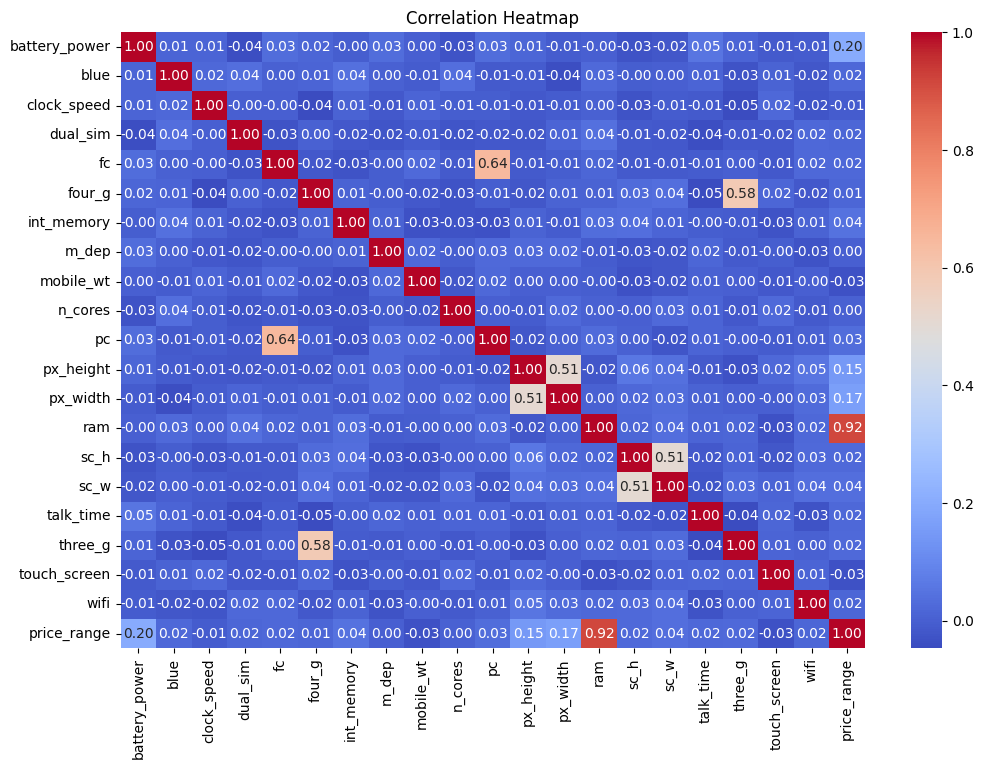

In [481]:
# Visualization 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()
# ram and price_range have a high positive correlation (0.92), indicating that higher RAM is strongly associated with higher price ranges
# pc (primary camera) and fc (front camera) also show a moderate positive correlation (0.64)
# three_g and four_g have a moderate correlation (0.58), suggesting a link between devices supporting 3G and 4G technologies
# px_height and px_width have a moderate correlation (0.51), showing that devices with higher pixel height tend to have higher pixel width
# Most other variables have very weak or negligible correlations with one another, as their coefficients are close to 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


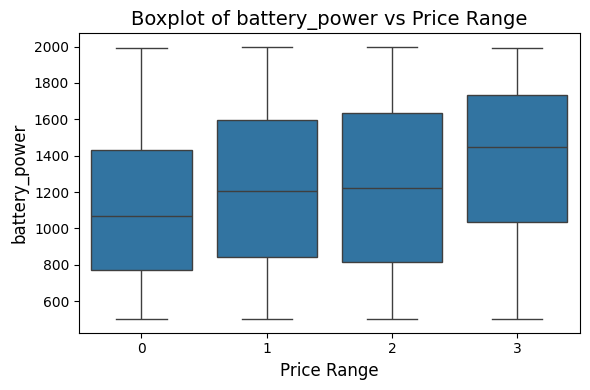

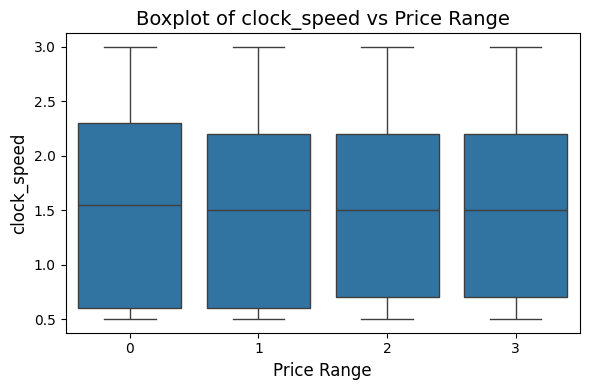

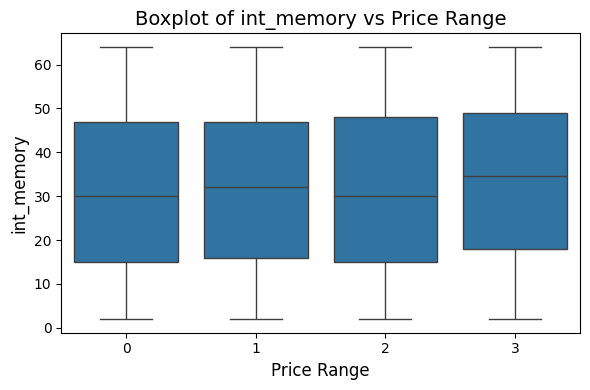

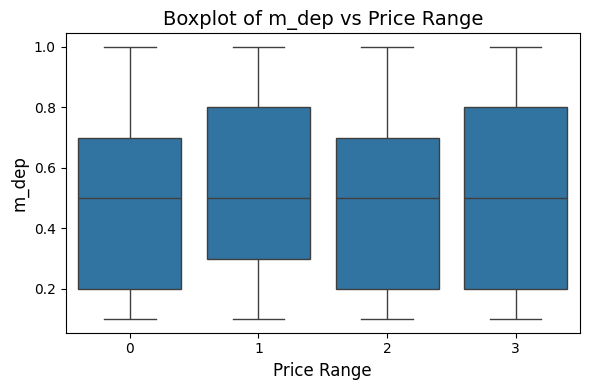

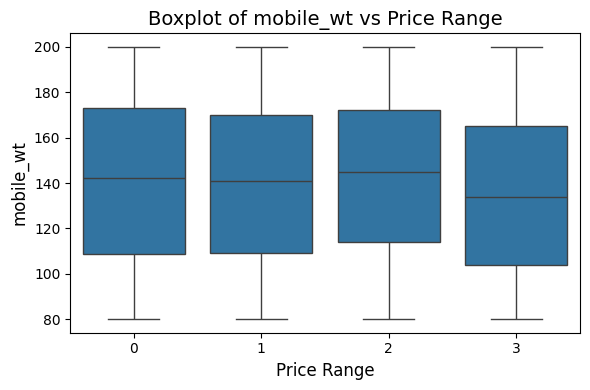

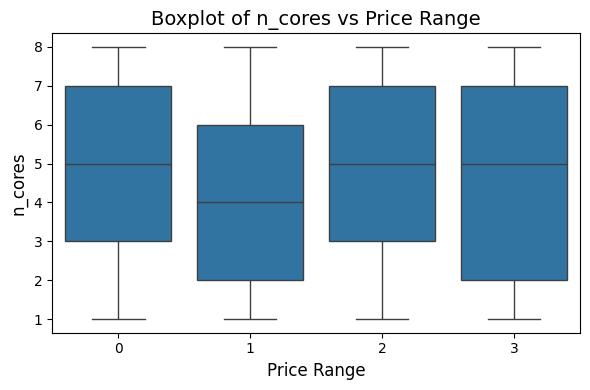

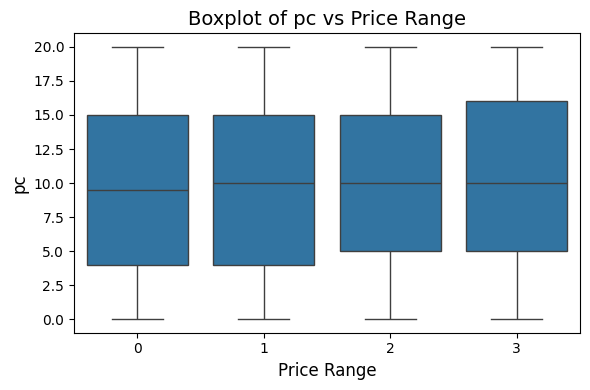

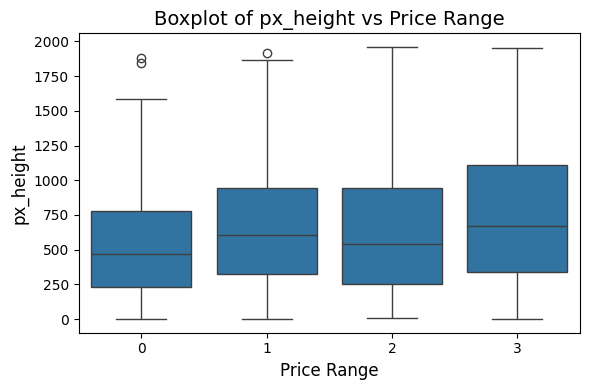

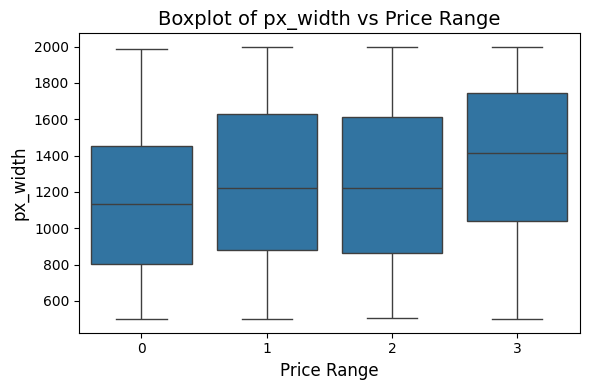

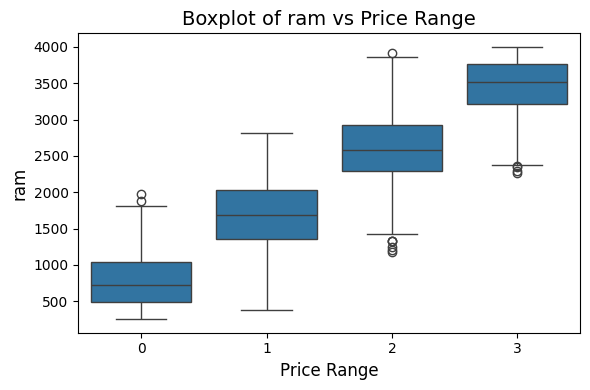

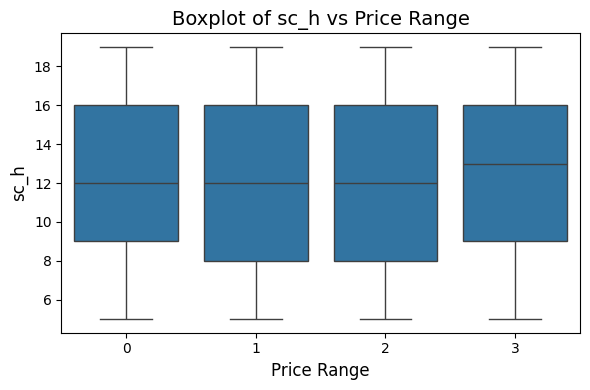

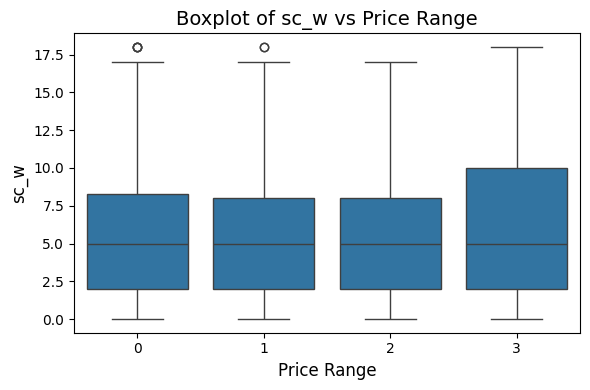

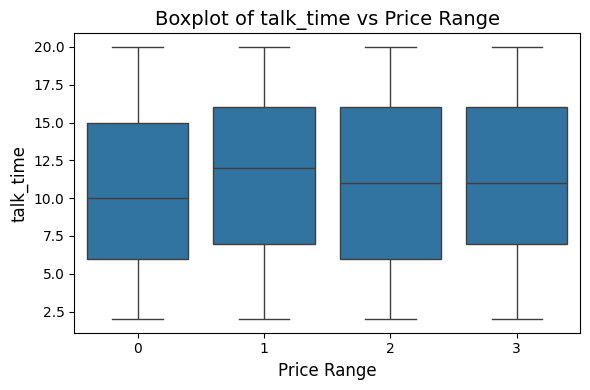

In [482]:
# Visualizaiton 2. Boxplot of Numerical Features vs. Price Range
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(f"Boxplot of {feature} vs Price Range", fontsize=14)
    plt.xlabel("Price Range", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


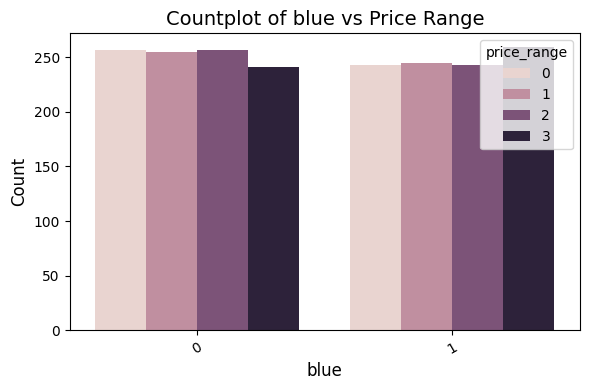

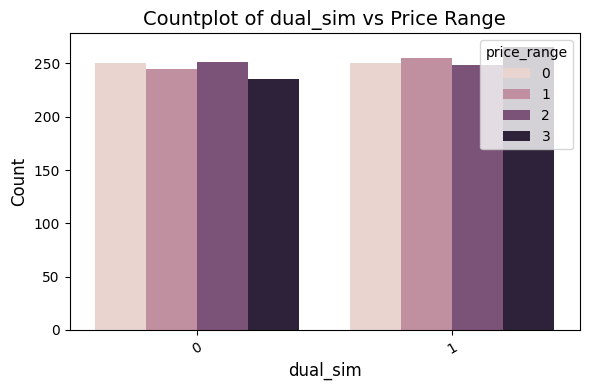

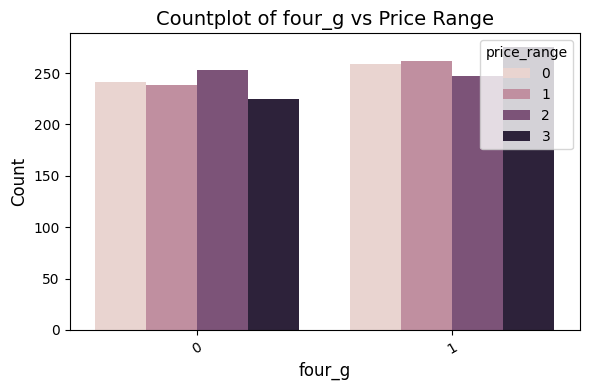

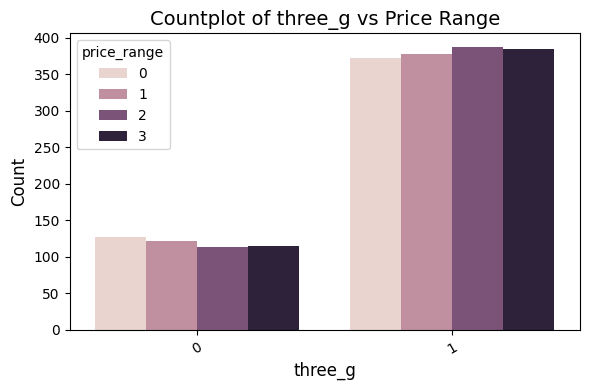

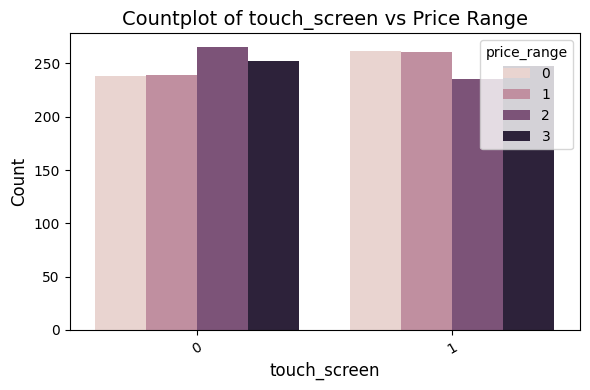

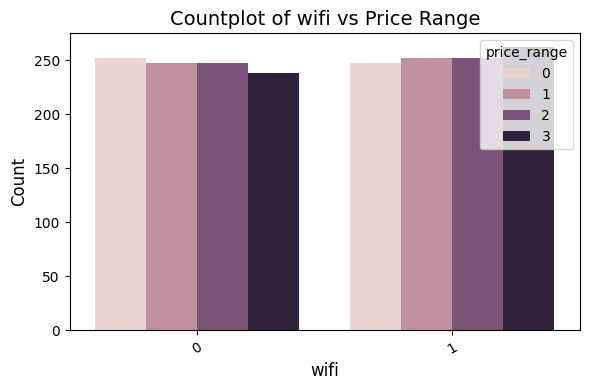

In [483]:
# Visualization 3. Countplot of Categorical Features vs. Price Range

categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='price_range', data=df)
    plt.title(f"Countplot of {feature} vs Price Range", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, fontsize=10)
    plt.tight_layout()
    plt.show()

## Machine Learning (Split Data)

In [484]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
features_to_scale = ["battery_power", "ram", "px_height", "px_width"]

# Scaling the features and data
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Show top 5 rows of the data
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,2.2,0,1,0,7,0.6,188,2,...,0.010204,0.170895,0.612774,9,7,19,0,0,1,1
1,0.347361,1,0.5,1,0,1,53,0.7,136,3,...,0.461735,0.993324,0.634687,17,3,7,1,1,0,2
2,0.041416,1,0.5,1,2,1,41,0.9,145,5,...,0.644388,0.811749,0.627205,11,2,9,1,1,0,2
3,0.076152,1,2.5,0,0,0,10,0.8,131,6,...,0.620408,0.858478,0.671566,16,8,11,1,0,0,2
4,0.881764,1,1.2,0,13,1,44,0.6,141,2,...,0.616327,0.475300,0.308658,8,2,15,1,1,0,1


In [485]:
df_scaled.describe()
# Show count, mean, standard deviation, min, max and the quartiles of the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,0.329137,0.501679,0.499255,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,0.293533,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,0.226419,0.288518,0.289880,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,0.144260,0.250167,0.254276,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,0.484302,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,0.287755,0.498665,0.505211,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,0.744322,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,0.483291,0.756342,0.750534,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1.000000,1.000000,1.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [486]:
# Dropping unnecessary columns and defining features and target
X = df_scaled.drop(['price_range', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], axis = 1)

# Target variable
y = df_scaled['price_range']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [487]:
from imblearn.combine import SMOTEENN

# SMOTEENN for handling class imbalance
smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

Class distribution after SMOTEEN:
price_range
0    405
3    390
1    310
2    269
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.C

In [488]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((1099, 4), (275, 4))

## **1. Classification**

## Logistic Regression

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=1000, random_state=42)

In [490]:
# Predictions
y_pred_logreg = logreg.predict(X_test)
y_train_logreg = logreg.predict(X_train)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9709090909090909


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [491]:
# Accuracy calculation
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
training_accuracy_logreg = accuracy_score(y_train, y_train_logreg)

# Printing the results
print(f"Logistic Regression Testing accuracy: {test_accuracy_logreg:.4f}")
print(f"Logistic Regression Training accuracy: {training_accuracy_logreg:.4f}")
# The margin is less than 1%, so we conclude that the model is well-fitted

Logistic Regression Testing accuracy: 0.9709
Logistic Regression Training accuracy: 0.9700


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


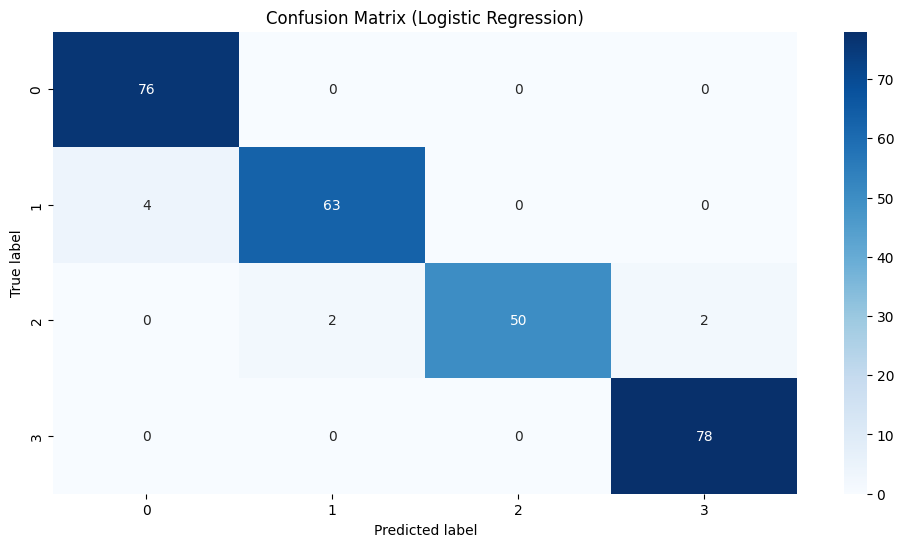

In [492]:
cm_rf = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(12,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of logistic regression results in 267 right predcitions out of 275 datas

In [493]:
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("Classification Report Logistic Regression: \n", class_report_logreg)
# Classification report of the random forest
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.97      0.94      0.95        67
           2       1.00      0.93      0.96        54
           3       0.97      1.00      0.99        78

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Logistic Regression):**
- The Logistic Regression model shows excellent performance, with consistent precision, recall, and F1-scores across the classes. It appears to be handling all classes well without overfitting to any particular one. Class 2 is the only class where the recall is slightly lower, but the model's overall behavior is strong, and this minor gap doesn't significantly affect its effectiveness. The consistent results in accuracy, precision, recall, and F1-score imply the model generalizes well and is unlikely to be overfitting.

## Random Forest

In [494]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [495]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9818181818181818


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [496]:
# Accuracy calculation
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
training_accuracy_rf = accuracy_score(y_train, y_train_rf)

# Printing the results
print(f"Random Forest Testing accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest Training accuracy: {training_accuracy_rf:.4f}")
# The Random Forest model is likely overfitting because of its perfect performance on training data
# Overfitting occurs when a model is too complex, such as when it fits the training data too closely (over-learns), and as a result, it struggles to generalize to unseen data
# It is usually reflected in a large gap between training and testing performance

Random Forest Testing accuracy: 0.9818
Random Forest Training accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


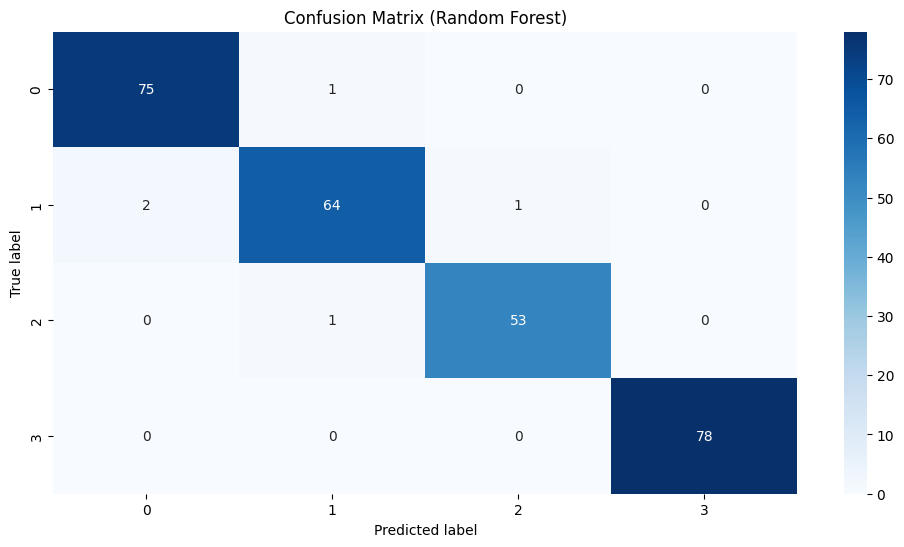

In [497]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of random forest results in 270 right predcitions out of 275 datas

In [498]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)
# Classification report of the random forest
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.96      0.96        67
           2       0.98      0.98      0.98        54
           3       1.00      1.00      1.00        78

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Random Forest):**
- The Random Forest model is performing exceptionally well with high accuracy and consistent performance across all classes. Class 3 shows perfect precision and recall, which is excellent. However, this might also hint at possible overfitting, especially since the training accuracy was 100% (as you previously mentioned), suggesting that the model might have memorized this class in particular. The minor differences between precision and recall in other classes (like Class 1) are acceptable and don't significantly detract from the overall performance.

## Gradient Boosting

In [499]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42) # Modelling and fitting using gradient boosting classifier with random state = 42
gb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GradientBoostingClassifier(random_state=42)

In [500]:
# Predictions
y_pred_gb = gb.predict(X_test)
y_train_gb = gb.predict(X_train)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9709090909090909


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [501]:
# Accuracy calculation
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
training_accuracy_gb = accuracy_score(y_train, y_train_gb)

# Printing the results
print(f"Gradient Boosting Testing accuracy: {test_accuracy_gb:.4f}")
print(f"Gradient Boosting Training accuracy: {training_accuracy_gb:.4f}")
# The Gradient Boosting model is overfitting because it achieves perfect training accuracy but fails to generalize perfectly to testing data
# Overfitting typically happens when a model is too complex and fits the training data too closely, capturing noise or irrelevant patterns that do not generalize well to new data
# In this case, the model's perfect performance on the training set suggests it may have overfitted

Gradient Boosting Testing accuracy: 0.9709
Gradient Boosting Training accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


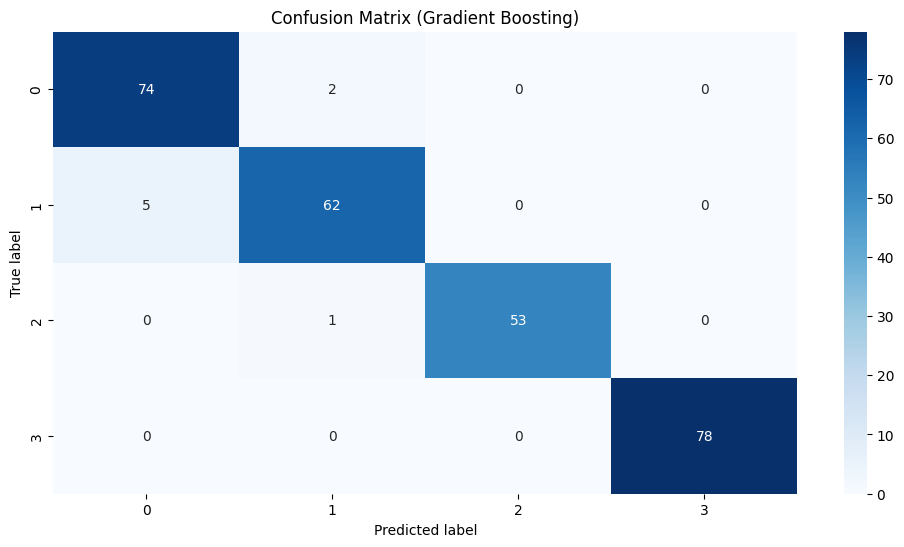

In [502]:
cm_xg = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(12,6))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of gradient boosting results in 267 right predcitions out of 275 datas

In [503]:
class_report_xg = classification_report(y_test, y_pred_gb)

print("Classification Report Gradient Boosting: \n", class_report_xg)
# Classification report of the gradient boosting
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.95      0.93      0.94        67
           2       1.00      0.98      0.99        54
           3       1.00      1.00      1.00        78

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Gradient Boosting):**
-The Gradient Boosting model is performing very well overall, with strong precision, recall, and F1-scores for each class. The model does especially well on class 3, where it achieves perfect performance. Class 2 also has great performance, with high precision and recall. Class 1 has a small gap between precision and recall, but this is not a major concern and is still well within acceptable limits. Class 0 has slightly lower precision but still performs well overall.

**Final Thoughts & Recommendations on Classificiation**
1. Best Predicted Classes Across Models:
- Class 3: Perfect performance (or very close) across all models.
- Class 2: Almost perfect in Random Forest and Gradient Boosting, with very high precision and recall.

2. Worst Predicted Classes Across Models:
- Class 1: While the performance is still good, this class is consistently the most challenging for all models, with the lowest recall in both Random Forest and Gradient Boosting.
- Class 0: Logistic Regression slightly struggles with precision (though recall is high).

3. Personally, Logistic Regression may be the safest choice to avoid overfitting since it shows balanced performance across classes and generalizes well. However, Random Forest and Gradient Boosting provide better performance overall, particularly on Class 3 and Class 2. My recommendations are to choose Logistic Regression for generalization, but choose Random Forest and Gradient Boosting if accuracy is the priority.

4. SMOOTEENN helps improving the performance of machine learning models on imbalanced datasets, especially when noise and outliers are present.

5. Using only around 4 out of 21 variables from the dataset simplifies the prediction process, demonstrating that effective data exploration can often lead to better results.

## **2. Clustering**

In [504]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Apply standard scaling to the dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)  # Convert scaled data back to a DataFrame

# Display the first 5 rows of the scaled DataFrame
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


## K-means Clustering

K-means uses the elbow method and determines the number of clusters to be formed.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


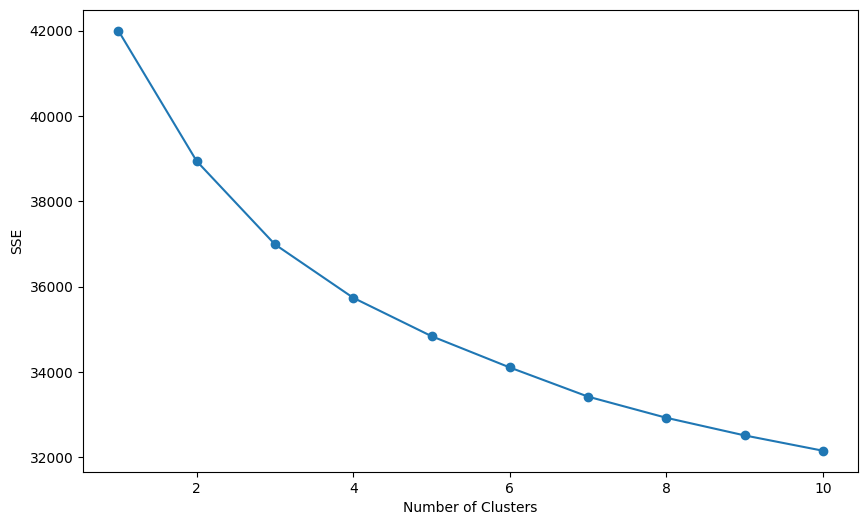

In [505]:
# K-Means Clustering
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.show()
# Use 'elbow method' to help determine how many clusters are optimal in order to identify the point where the SSE starts to decrease more slowly
# This point is regarded as the ideal number of clusters, as incorporating additional clusters beyond this stage does not substantially enhance the fit and instead adds complexity

In [506]:
# Create an instance of KneeLocator to identify the optimal number of clusters
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

print(f"The best k for your model is : {optimal_k}")
# This algorithm assists in determining the most suitable number of clusters, supporting the earlier statement

The best k for your model is : 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train the K-Means model on the dataset with the number of clusters we have determined.

In [507]:
kmeans = KMeans(n_clusters=kl.elbow, init ='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

# Training the KMeans model for clustering with the number of clusters set to 4
# This aims to group the data into distinct clusters or categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 0, 0, ..., 0, 2, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


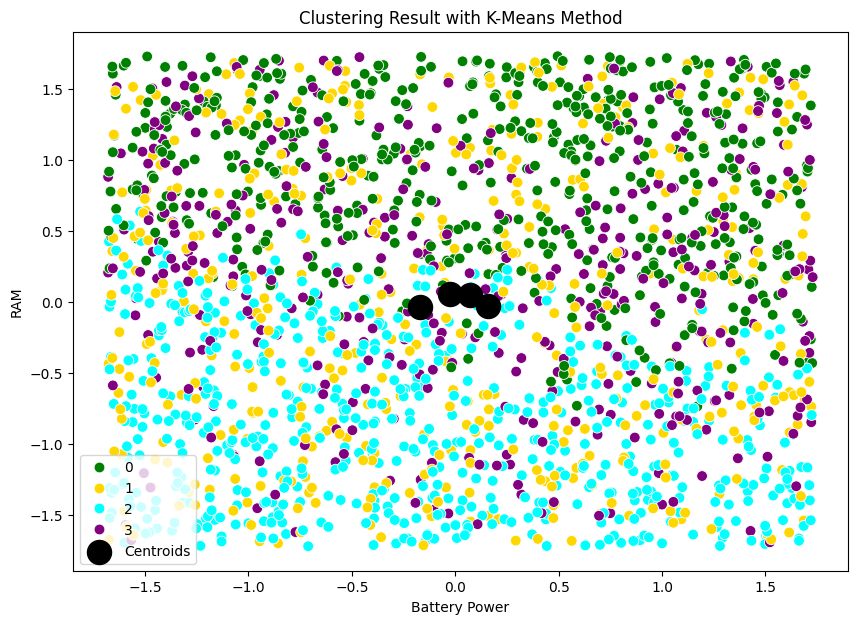

In [508]:
# Visualize the result using scatter chart
plt.figure(figsize=(10, 7))

sns.scatterplot(
    x="battery_power",
    y="ram",
    hue=y_pred,
    palette=["green", "gold", "cyan", "purple"],
    data=df_scaled,
    s=60
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black", label="Centroids")
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Clustering Result with K-Means Method')
plt.legend()
plt.show()

In [509]:
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

df_inverse['KMeans'] = y_pred
# Inverse transform the scaled data to get the original values

df_inverse.head(5)
# Show top 5 rows of the data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0,0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0,0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0,0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0,3


In [510]:
df['KMeans'] = kmeans.labels_
# Inverse transform the scaled numeric columns to retrieve the original values

df_scaled = scaler.inverse_transform(df_scaled)

df.head()
# Display the first few rows of the DataFrame to verify the original values for numeric columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,3


In [511]:
df['KMeans'].value_counts().sort_index()
# Count data from each cluster to see the distribution of clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
KMeans,
0,548
1,463
2,600
3,389


In [512]:
# aggregation

# Perform KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Group by KMeans Clusters and calculate summary statistics
summary_stats = {
    'battery_power': ['mean', 'min', 'max'],
    'blue': ['mean', 'min', 'max'],
    'clock_speed': ['mean', 'min', 'max'],
    'dual_sim': ['mean', 'min', 'max'],
    'fc': ['mean', 'min', 'max'],
    'four_g': ['mean', 'min', 'max'],
    'int_memory': ['mean', 'min', 'max'],
    'm_dep': ['mean', 'min', 'max'],
    'mobile_wt': ['mean', 'min', 'max'],
    'n_cores': ['mean', 'min', 'max'],
    'pc': ['mean', 'min', 'max'],
    'px_height': ['mean', 'min', 'max'],
    'px_width': ['mean', 'min', 'max'],
    'ram': ['mean', 'min', 'max'],
    'sc_h': ['mean', 'min', 'max'],
    'sc_w': ['mean', 'min', 'max'],
    'talk_time': ['mean', 'min', 'max'],
    'three_g': ['mean', 'min', 'max'],
    'touch_screen': ['mean', 'min', 'max'],
    'wifi': ['mean', 'min', 'max'],
}

cluster_summary = df.groupby('Cluster').agg(summary_stats)

# Flatten MultiIndex columns for better readability
cluster_summary.columns = [f"{col[0]} ({col[1]})" for col in cluster_summary.columns]

# Transpose the results to swap rows and columns
transposed_summary = cluster_summary.transpose()

# Display the transposed results as a styled DataFrame for better visualization
styled_summary = transposed_summary.style.format(precision=2)

# Display the styled DataFrame
styled_summary

# Transposing the summary for better readability and displaying the transposed cluster summary
# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster,0,1,2,3
battery_power (mean),1239.23,1232.99,1250.72,1236.30
battery_power (min),501.00,503.00,502.00,501.00
battery_power (max),1994.00,1996.00,1997.00,1998.00
blue (mean),0.52,0.48,0.47,0.50
blue (min),0.00,0.00,0.00,0.00
blue (max),1.00,1.00,1.00,1.00
clock_speed (mean),1.53,1.56,1.46,1.50
clock_speed (min),0.50,0.50,0.50,0.50
clock_speed (max),3.00,3.00,3.00,3.00
dual_sim (mean),0.55,0.48,0.49,0.50


**K-Means Model Interpretation**
- Cluster 0 (548 data points): Represents premium or flagship phones with high RAM, good camera specs, decent storage, and above-average battery capacity. These are suitable for users looking for high performance and camera quality.
- Cluster 1 (463 data points): Represents budget or entry-level phones, characterized by low RAM, lower resolution, and decent camera specs. These are likely affordable devices targeting cost-conscious users.
- Cluster 2 (600 data points): Represents mid-range phones with good resolution and moderate RAM. These phones balance performance and affordability, appealing to users seeking better display quality and storage.
- Cluster 3 (389 data points): Represents balanced phones, offering decent RAM and camera specs at a lighter weight. These devices might appeal to users prioritizing performance and portability without premium features.

## Hierarchical Clustering

Hierarchical clustering uses the agglomerative method.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


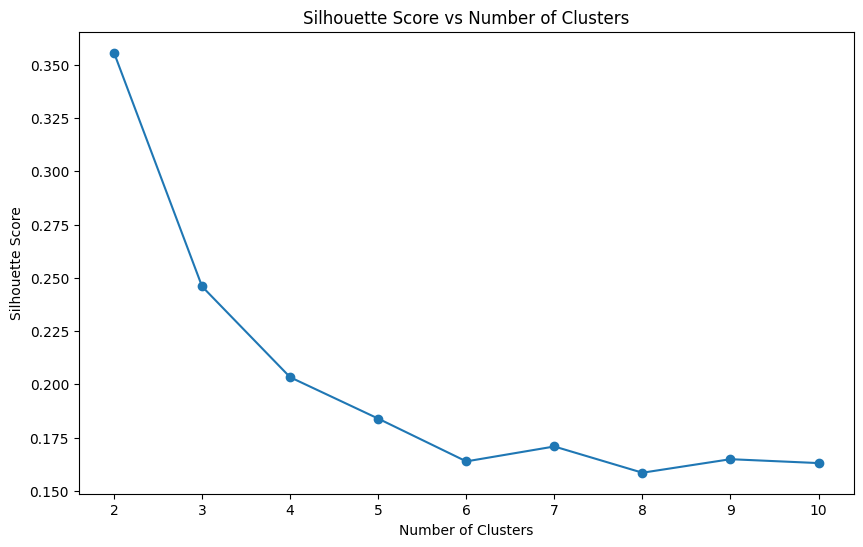

In [513]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
# Calculate silhouette scores for different numbers of clusters using Agglomerative Clustering

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df_scaled)
    # Loop through the range of cluster numbers to calculate silhouette scores

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # Calculate the silhouette score for the current number of clusters

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# Plotting the silhouette scores against the number of clusters

In [514]:
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nThe best number of clusters is: {best_k}")
# Determine the best number of clusters based on the highest silhouette score

# This process helps identify the optimal number of clusters by evaluating how well-separated the clusters are
# A higher silhouette score indicates better-defined clusters, assisting in making an informed decision for clustering


The best number of clusters is: 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [515]:
# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [516]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df['AgglomerativeCluster'] = y_pred

# Show top 5 rows of the data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans,Cluster,AgglomerativeCluster
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,1,3,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,3,2,1


In [517]:
df['AgglomerativeCluster'].value_counts().sort_index()
# Count data from each cluster to see the distribution of clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
AgglomerativeCluster,
0,1267
1,733


In [518]:
# aggregation

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
df['ClusterLabel'] = agglo.fit_predict(df_scaled)

# Group by Agglomerative Clusters and calculate summary statistics
cluster_summary = df.groupby('ClusterLabel').agg(
    {
        'battery_power': ['mean', 'min', 'max'],
        'blue': ['mean', 'min', 'max'],
        'clock_speed': ['mean', 'min', 'max'],
        'dual_sim': ['mean', 'min', 'max'],
        'fc': ['mean', 'min', 'max'],
        'four_g': ['mean', 'min', 'max'],
        'int_memory': ['mean', 'min', 'max'],
        'm_dep': ['mean', 'min', 'max'],
        'mobile_wt': ['mean', 'min', 'max'],
        'n_cores': ['mean', 'min', 'max'],
        'pc': ['mean', 'min', 'max'],
        'px_height': ['mean', 'min', 'max'],
        'px_width': ['mean', 'min', 'max'],
        'ram': ['mean', 'min', 'max'],
        'sc_h': ['mean', 'min', 'max'],
        'sc_w': ['mean', 'min', 'max'],
        'talk_time': ['mean', 'min', 'max'],
        'three_g': ['mean', 'min', 'max'],
        'touch_screen': ['mean', 'min', 'max'],
        'wifi': ['mean', 'min', 'max'],
    }
)

# Flattening MultiIndex columns for better readability
cluster_summary.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in cluster_summary.columns]

# Transposing the result to swap rows and columns
cluster_summary_transposed = cluster_summary.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
styled_summary = cluster_summary_transposed.style.format(precision=2)

# Display the styled DataFrame
styled_summary

# Transposing the summary for better readability and displaying the transposed cluster summary
# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ClusterLabel,0,1
battery_power (mean),1206.22,1294.35
battery_power (min),501.00,503.00
battery_power (max),1998.00,1996.00
blue (mean),0.50,0.48
blue (min),0.00,0.00
blue (max),1.00,1.00
clock_speed (mean),1.53,1.51
clock_speed (min),0.50,0.50
clock_speed (max),3.00,3.00
dual_sim (mean),0.51,0.50


**Hierarchical Model Interpretation**
- Cluster 0 (1267 data points): Generally contains phones with higher memory (RAM), higher processing power, and better front camera quality, while also supporting more advanced connectivity options like 4G. The phones in this cluster are lighter and offer better pixel density and performance.
- Cluster 1 (733 data points) : Has phones with slightly lower RAM and processing power. They also have slightly lower front camera quality and battery power, but offer longer talk time and a higher proportion of 3G connectivity. These phones may be less feature-rich compared to Cluster 0 but offer more endurance in battery life.

In essence, Cluster 0 represents  more advanced, high-performance phones, while Cluster 1 consists of phones that are more budget-friendly or optimized for battery longevity.

**Final Thoughts & Recommendations on Clustering**

1. For Premium Customers: Phones in Cluster 0 (both K-Means and Hierarchical) are ideal. These users will prioritize top-tier performance, camera quality, and the latest connectivity features. Brands targeting this segment should focus on promoting advanced technologies such as superior RAM, fast processing speeds, high-end cameras, and 4G/5G support.
2. For Budget-Conscious Customers: Phones from Cluster 1 (K-Means) and Cluster 1 (Hierarchical) are the best fit. These customers need affordable options with decent functionality. Marketing strategies should emphasize cost-effectiveness, long battery life, and good basic features like camera quality and 3G support.
3. For Users Seeking a Balance Between Cost and Features: Phones in Cluster 2 (K-Means) and Cluster 3 (K-Means) would appeal to these customers. These phones offer a good trade-off between performance and price, making them ideal for users who want a better display, more storage, and decent RAM without spending too much. Additionally, Cluster 3 offers a good mix of portability with sufficient power.
4. For Portability and Light Usage: Phones in Cluster 3 (K-Means) and Cluster 1 (Hierarchical) are recommended for users who prioritize lightweight devices and good battery life over cutting-edge specs. These phones offer decent all-around features without being bulky or too expensive.

In [519]:
# Loop for determining the optimal number of clusters using silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    # Trying all cluster counts from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    # df_scaled = preprocessed dataset
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"Total Clusters: {k}, Silhouette Score: {score}")

# A higher silhouette score means better-defined clusters
# Although the silhouette score decreases as the number of clusters increases, the score for 2 clusters is the highest among all options, indicating that the clustering structure is most meaningful with 2 clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Clusters: 2, Silhouette Score: 0.4012285898271234
Total Clusters: 3, Silhouette Score: 0.2775539635965582
Total Clusters: 4, Silhouette Score: 0.26207818899114865
Total Clusters: 5, Silhouette Score: 0.2421933337872067
Total Clusters: 6, Silhouette Score: 0.23545057121398177
Total Clusters: 7, Silhouette Score: 0.22705888681328026
Total Clusters: 8, Silhouette Score: 0.22072575707688688
Total Clusters: 9, Silhouette Score: 0.2260951715252185


## Hierarchical Visualization

Single Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


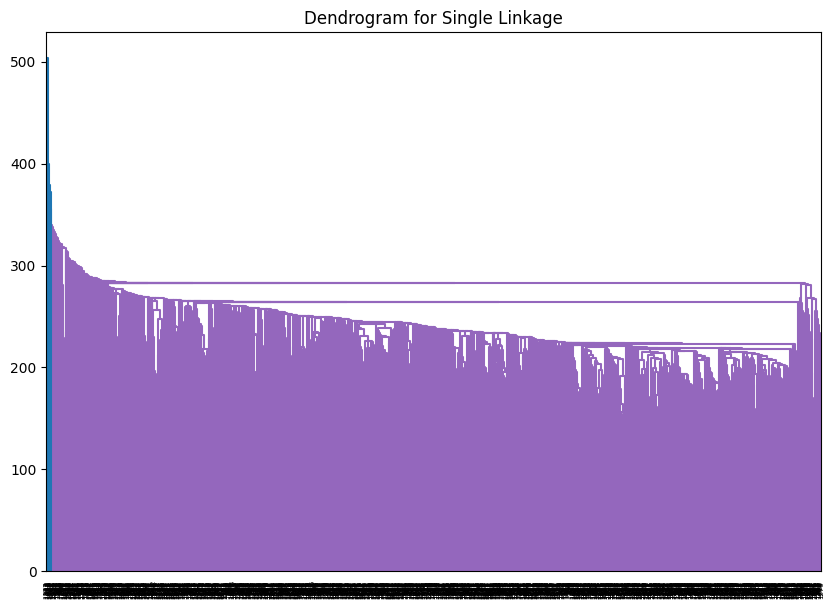

In [520]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
# Single: Combining clusters based on the shortest distance between two points from different clusters

plt.show()

Complete Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


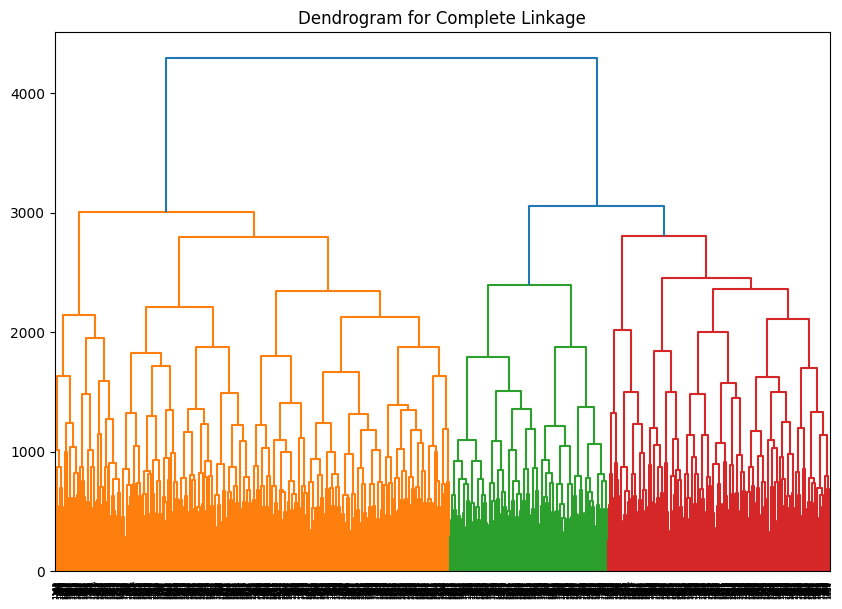

In [521]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
# Complete: Combining clusters based on the furthest distance between two points from different clusters.

plt.show()

Average Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


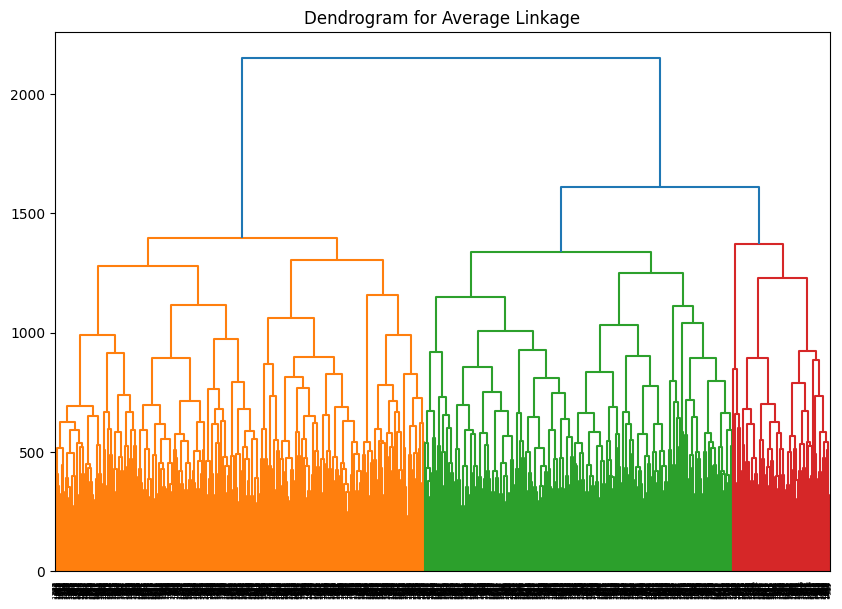

In [522]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Average Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
# Average: Combining clusters based on the average distance between all pairs of points from two clusters.

plt.show()

WARD Method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


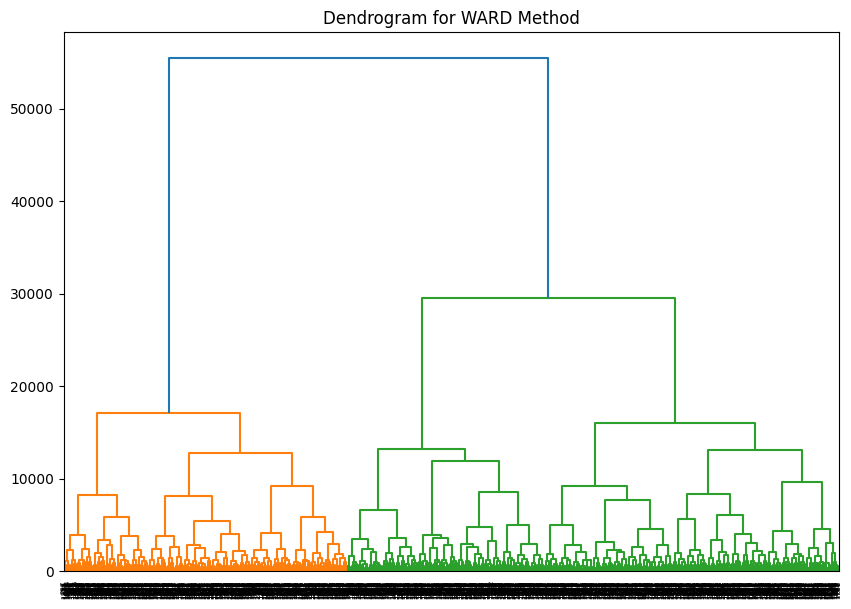

In [523]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
# WARD: Combining clusters by minimizing the increase in total variance within clusters.

plt.show()